In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [16]:
conda install python-graphviz

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\tashi\anaconda3

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.3                |           py37_0         2.8 MB
    graphviz-2.38              |       hfd603c8_2        29.3 MB
    python-graphviz-0.14       |             py_0          25 KB
    ------------------------------------------------------------
                                           Total:        32.2 MB

The following NEW packages will be INSTALLED:

  graphviz           pkgs/main/win-64::graphviz-2.38-hfd603c8_2
  python-graphviz    pkgs/main/noarch::python-graphviz-0.14-py_0

The following packages will be UPDATED:

  conda                                        4.8.2-py37_0 --> 4.8.3-py37_0




python-graphviz-0.14 | 25 KB     |            |   0% 
python-graphviz-0

In [4]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [5]:
df = pd.read_csv('bl.txt', header = 0)

In [6]:
df.describe()

,left_weight,left_distance,right_weight,right_distance
count,625.000000,625.000000,625.000000,625.000000
mean,3.000000,3.000000,3.000000,3.000000
std,1.415346,1.415346,1.415346,1.415346
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


In [7]:
df.shape

(625, 5)

In [8]:
X = df.drop('balance', axis = 1)
Y = df[['balance']]

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state = 42)

In [10]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion = 'gini')

In [11]:
dtc.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

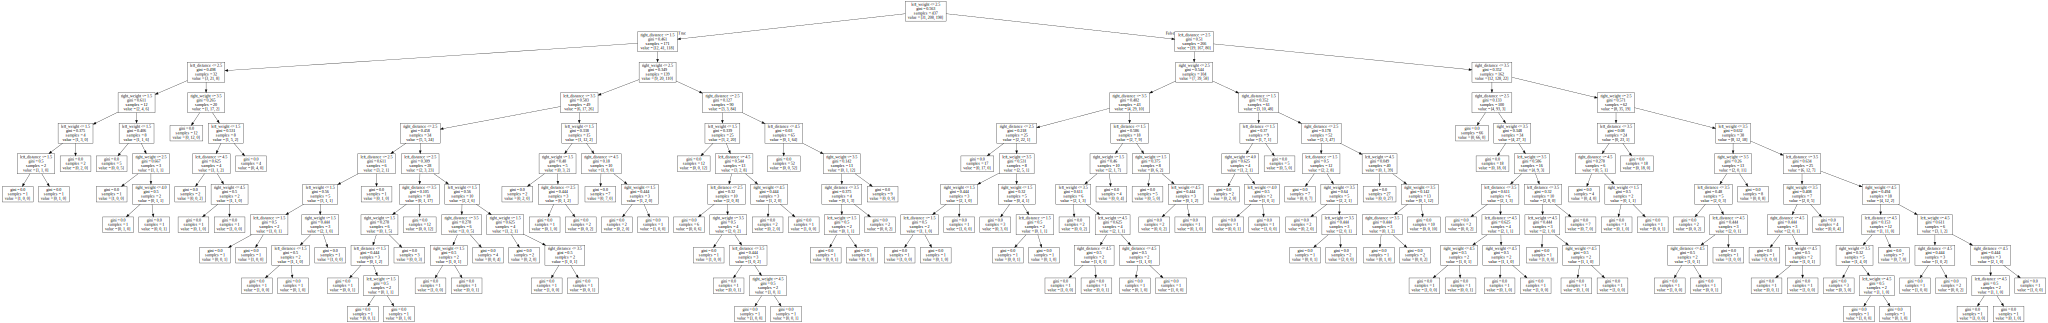

In [55]:
import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(dtc,out_file=None, feature_names = X.columns)
graph = graphviz.Source(dot_data)
graph

from sklearn import tree
tree.plot_tree(dtc)
plt.figure(figsize=(30,10))
a = plot_tree(dtc, 
              feature_names=X.columns, 
              class_names=["B","L","R"], 
              filled=True, 
              rounded=True, 
              fontsize=14)

In [24]:
dtc1 = DecisionTreeClassifier(criterion = 'entropy')
dtc1.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

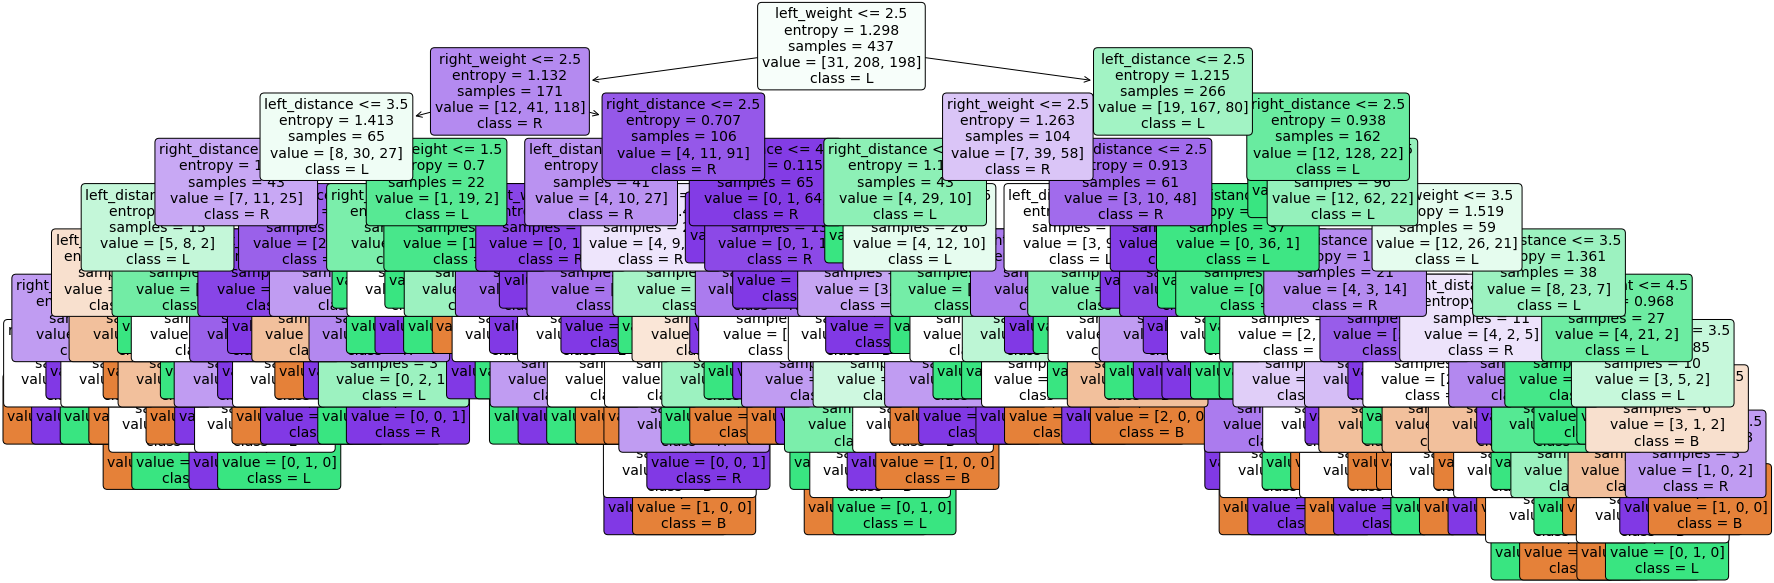

In [28]:
plt.figure(figsize=(30,10))
a = plot_tree(dtc1, 
              feature_names=X.columns, 
              class_names=["B","L","R"], 
              filled=True, 
              rounded=True, 
              fontsize=14)

In [48]:
X_train.reset_index()[(X_train.reset_index().left_weight == 4) & (X_train.reset_index().left_distance == 4) & (X_train.reset_index().right_weight == 3) & (X_train.reset_index().right_distance == 3)]

,index,left_weight,left_distance,right_weight,right_distance
67,462,4,4,3,3


In [63]:
ypred = dtc.predict(X_train)
ypred

array(['L', 'R', 'R', 'R', 'B', 'L', 'R', 'B', 'L', 'L', 'R', 'L', 'L',
       'L', 'R', 'L', 'R', 'R', 'B', 'R', 'R', 'R', 'L', 'R', 'R', 'R',
       'R', 'L', 'L', 'L', 'R', 'L', 'L', 'R', 'R', 'R', 'R', 'R', 'R',
       'L', 'R', 'R', 'L', 'B', 'R', 'L', 'B', 'R', 'R', 'R', 'L', 'L',
       'B', 'L', 'R', 'R', 'L', 'R', 'L', 'L', 'R', 'L', 'R', 'R', 'L',
       'L', 'L', 'L', 'L', 'L', 'R', 'L', 'R', 'R', 'R', 'L', 'L', 'L',
       'R', 'L', 'L', 'R', 'L', 'R', 'R', 'B', 'L', 'R', 'R', 'R', 'R',
       'R', 'L', 'R', 'L', 'L', 'L', 'L', 'L', 'L', 'R', 'L', 'R', 'L',
       'L', 'L', 'L', 'B', 'R', 'R', 'R', 'R', 'L', 'R', 'R', 'L', 'R',
       'R', 'L', 'L', 'L', 'R', 'L', 'L', 'L', 'B', 'R', 'R', 'L', 'L',
       'R', 'R', 'L', 'B', 'L', 'R', 'L', 'R', 'L', 'L', 'L', 'L', 'R',
       'L', 'R', 'L', 'R', 'R', 'R', 'L', 'L', 'L', 'L', 'L', 'L', 'L',
       'L', 'R', 'L', 'L', 'R', 'R', 'R', 'L', 'L', 'L', 'R', 'L', 'L',
       'R', 'L', 'R', 'R', 'R', 'L', 'L', 'R', 'R', 'L', 'R', 'L

In [64]:
y1pred = dtc1.predict(X_train)
y1pred

array(['L', 'R', 'R', 'R', 'B', 'L', 'R', 'B', 'L', 'L', 'R', 'L', 'L',
       'L', 'R', 'L', 'R', 'R', 'B', 'R', 'R', 'R', 'L', 'R', 'R', 'R',
       'R', 'L', 'L', 'L', 'R', 'L', 'L', 'R', 'R', 'R', 'R', 'R', 'R',
       'L', 'R', 'R', 'L', 'B', 'R', 'L', 'B', 'R', 'R', 'R', 'L', 'L',
       'B', 'L', 'R', 'R', 'L', 'R', 'L', 'L', 'R', 'L', 'R', 'R', 'L',
       'L', 'L', 'L', 'L', 'L', 'R', 'L', 'R', 'R', 'R', 'L', 'L', 'L',
       'R', 'L', 'L', 'R', 'L', 'R', 'R', 'B', 'L', 'R', 'R', 'R', 'R',
       'R', 'L', 'R', 'L', 'L', 'L', 'L', 'L', 'L', 'R', 'L', 'R', 'L',
       'L', 'L', 'L', 'B', 'R', 'R', 'R', 'R', 'L', 'R', 'R', 'L', 'R',
       'R', 'L', 'L', 'L', 'R', 'L', 'L', 'L', 'B', 'R', 'R', 'L', 'L',
       'R', 'R', 'L', 'B', 'L', 'R', 'L', 'R', 'L', 'L', 'L', 'L', 'R',
       'L', 'R', 'L', 'R', 'R', 'R', 'L', 'L', 'L', 'L', 'L', 'L', 'L',
       'L', 'R', 'L', 'L', 'R', 'R', 'R', 'L', 'L', 'L', 'R', 'L', 'L',
       'R', 'L', 'R', 'R', 'R', 'L', 'L', 'R', 'R', 'L', 'R', 'L

In [65]:
L = []
for i in range(len(X_train)):
    if ypred[i] == y1pred[i]:
        L.append(True)
    else:
        L.append(False)

In [66]:
from collections import Counter
Counter(L)

Counter({True: 437})